In [1]:
import torch
import torch.nn.functional as F
import model, utils
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
from torchvision import transforms

In [2]:
device = utils.get_device()

CUDA Available:  True


In [3]:
## To get the std and mean value

import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define the transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load the CIFAR-10 dataset
cifar10_train = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
pixel_means = cifar10_train.data.mean(axis=(0,1,2)) / 255.0
pixel_stds = cifar10_train.data.std(axis=(0,1,2)) / 255.0

print('CIFAR-10 pixel means:', pixel_means)
print('CIFAR-10 pixel stds:', pixel_stds)

Files already downloaded and verified
CIFAR-10 pixel means: [0.49139968 0.48215841 0.44653091]
CIFAR-10 pixel stds: [0.24703223 0.24348513 0.26158784]


In [4]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                       #transforms.ColorJitter(brightness=0.40, contrast=0.4, saturation=0.40, hue=0.4),
                                       #transforms.RandomRotation((-7.0, 7.0), fill=(1,1,1)),
                                       #transforms.Resize((32, 32)),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
                                       transforms.ToTensor(),
                                       transforms.Normalize(pixel_means, pixel_stds),
                                       #transforms.RandomHorizontalFlip(p = 0.5),
                                       #transforms.RandomCrop(28, padding=4),
                                       #transforms.RandomErasing(p=0.5, scale=(0.2, 0.4), ratio=(0.3, 3.3))
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize(pixel_means, pixel_stds)
                                       ])

In [5]:
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

print(train.data.shape)

Files already downloaded and verified
Files already downloaded and verified
(50000, 32, 32, 3)


Files already downloaded and verified


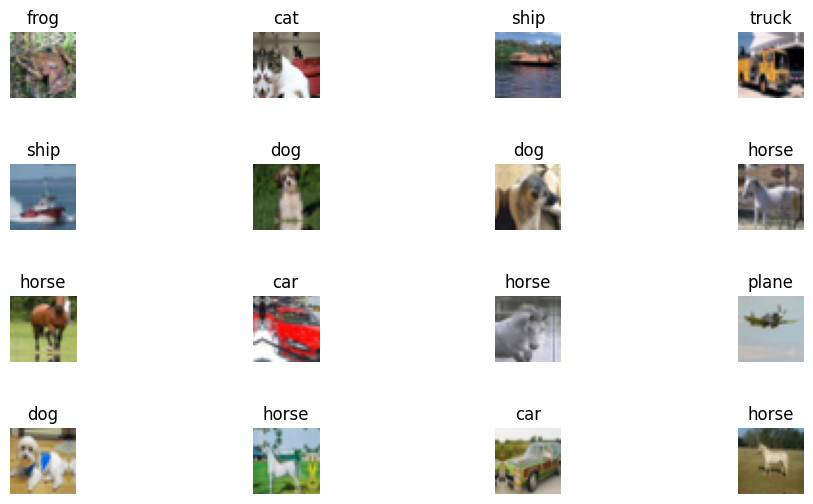

In [6]:
## Visulizing the data set

import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms

# Load the CIFAR-10 dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.RandomHorizontalFlip(),
     transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Get a batch of images from the dataloader
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Plot the images using Matplotlib
fig, axs = plt.subplots(4, 4, figsize=(12, 6))
for i in range(16):
    # Calculate the subplot index
    row = i // 4
    col = i % 4
    # Unnormalize the image
    img = images[i] / 2 + 0.5
    # Convert the image to a NumPy array
    npimg = img.numpy()
    # Transpose the image from (C, H, W) to (H, W, C)
    npimg = np.transpose(npimg, (1, 2, 0))
    # Plot the image
    axs[row, col].imshow(npimg)
    axs[row, col].set_title(classes[labels[i]])
    axs[row, col].axis('off')

fig.subplots_adjust(hspace=1)
plt.show()

In [7]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [8]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
cnnmodel = model.Net().to(device)
summary(cnnmodel, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
              ReLU-2           [-1, 16, 30, 30]               0
       BatchNorm2d-3           [-1, 16, 30, 30]              32
           Dropout-4           [-1, 16, 30, 30]               0
            Conv2d-5           [-1, 32, 28, 28]           4,608
              ReLU-6           [-1, 32, 28, 28]               0
       BatchNorm2d-7           [-1, 32, 28, 28]              64
           Dropout-8           [-1, 32, 28, 28]               0
            Conv2d-9           [-1, 10, 28, 28]             320
        MaxPool2d-10           [-1, 10, 14, 14]               0
           Conv2d-11           [-1, 16, 14, 14]           1,440
             ReLU-12           [-1, 16, 14, 14]               0

In [9]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

optimizer = optim.Adam(cnnmodel.parameters(), lr=0.01)
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=2, verbose=True)

EPOCHS = 20
criterion = F.nll_loss
misclassified = []
actual_labels = []
predicted_labels = []

In [10]:
for epoch in range(1, EPOCHS+1):
  print(f'Epoch {epoch}')
  loss = model.train(cnnmodel, device, train_loader, criterion, optimizer, epoch)
  scheduler.step(loss)
  model.test(cnnmodel, device, test_loader)

Epoch 1


Loss=1.228668451309204 Batch_id=390 Accuracy=42.31: 100%|██████████| 391/391 [00:36<00:00, 10.75it/s]



Test set: Average loss: 1.2645, Accuracy: 5287/10000 (52.87%)

4713
Epoch 2


Loss=1.1431543827056885 Batch_id=390 Accuracy=55.72: 100%|██████████| 391/391 [00:30<00:00, 12.66it/s]



Test set: Average loss: 1.1099, Accuracy: 5902/10000 (59.02%)

4098
Epoch 3


Loss=1.165198564529419 Batch_id=390 Accuracy=59.97: 100%|██████████| 391/391 [00:32<00:00, 12.09it/s]



Test set: Average loss: 1.0625, Accuracy: 6158/10000 (61.58%)

3842
Epoch 4


Loss=1.028730034828186 Batch_id=390 Accuracy=62.66: 100%|██████████| 391/391 [00:31<00:00, 12.31it/s]

Epoch 00004: reducing learning rate of group 0 to 1.0000e-03.



Test set: Average loss: 1.0225, Accuracy: 6262/10000 (62.62%)

3738
Epoch 5


Loss=1.035814642906189 Batch_id=390 Accuracy=66.39: 100%|██████████| 391/391 [00:31<00:00, 12.38it/s]



Test set: Average loss: 0.8534, Accuracy: 6922/10000 (69.22%)

3078
Epoch 6


Loss=0.8101679682731628 Batch_id=390 Accuracy=67.34: 100%|██████████| 391/391 [00:30<00:00, 12.61it/s]



Test set: Average loss: 0.8391, Accuracy: 6964/10000 (69.64%)

3036
Epoch 7


Loss=0.6821407079696655 Batch_id=390 Accuracy=67.96: 100%|██████████| 391/391 [00:31<00:00, 12.30it/s]

Epoch 00007: reducing learning rate of group 0 to 1.0000e-04.



Test set: Average loss: 0.8356, Accuracy: 6973/10000 (69.73%)

3027
Epoch 8


Loss=1.0156331062316895 Batch_id=390 Accuracy=68.21: 100%|██████████| 391/391 [00:32<00:00, 12.13it/s]



Test set: Average loss: 0.8211, Accuracy: 7035/10000 (70.35%)

2965
Epoch 9


Loss=0.8103907704353333 Batch_id=390 Accuracy=68.68: 100%|██████████| 391/391 [00:31<00:00, 12.60it/s]



Test set: Average loss: 0.8196, Accuracy: 7040/10000 (70.40%)

2960
Epoch 10


Loss=1.2694262266159058 Batch_id=390 Accuracy=68.67: 100%|██████████| 391/391 [00:31<00:00, 12.39it/s]



Test set: Average loss: 0.8207, Accuracy: 7039/10000 (70.39%)

2961
Epoch 11


Loss=0.8526636362075806 Batch_id=390 Accuracy=68.80: 100%|██████████| 391/391 [00:33<00:00, 11.80it/s]



Test set: Average loss: 0.8193, Accuracy: 7039/10000 (70.39%)

2961
Epoch 12


Loss=0.7537133097648621 Batch_id=390 Accuracy=68.73: 100%|██████████| 391/391 [00:32<00:00, 12.12it/s]



Test set: Average loss: 0.8177, Accuracy: 7054/10000 (70.54%)

2946
Epoch 13


Loss=0.864104151725769 Batch_id=390 Accuracy=68.92: 100%|██████████| 391/391 [00:30<00:00, 12.62it/s]

Epoch 00013: reducing learning rate of group 0 to 1.0000e-05.



Test set: Average loss: 0.8166, Accuracy: 7069/10000 (70.69%)

2931
Epoch 14


Loss=1.0587151050567627 Batch_id=390 Accuracy=69.06: 100%|██████████| 391/391 [00:32<00:00, 11.93it/s]



Test set: Average loss: 0.8165, Accuracy: 7061/10000 (70.61%)

2939
Epoch 15


Loss=0.75398188829422 Batch_id=390 Accuracy=68.85: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]



Test set: Average loss: 0.8149, Accuracy: 7080/10000 (70.80%)

2920
Epoch 16


Loss=0.760419487953186 Batch_id=390 Accuracy=68.86: 100%|██████████| 391/391 [00:31<00:00, 12.23it/s]

Epoch 00016: reducing learning rate of group 0 to 1.0000e-06.



Test set: Average loss: 0.8218, Accuracy: 7073/10000 (70.73%)

2927
Epoch 17


Loss=0.8054366111755371 Batch_id=390 Accuracy=68.91: 100%|██████████| 391/391 [00:31<00:00, 12.58it/s]



Test set: Average loss: 0.8134, Accuracy: 7072/10000 (70.72%)

2928
Epoch 18


Loss=1.00465726852417 Batch_id=390 Accuracy=69.16: 100%|██████████| 391/391 [00:31<00:00, 12.39it/s]



Test set: Average loss: 0.8133, Accuracy: 7073/10000 (70.73%)

2927
Epoch 19


Loss=0.7953631281852722 Batch_id=390 Accuracy=69.01: 100%|██████████| 391/391 [00:32<00:00, 11.94it/s]

Epoch 00019: reducing learning rate of group 0 to 1.0000e-07.



Test set: Average loss: 0.8163, Accuracy: 7070/10000 (70.70%)

2930
Epoch 20


Loss=0.9712470173835754 Batch_id=390 Accuracy=68.80: 100%|██████████| 391/391 [00:31<00:00, 12.37it/s]



Test set: Average loss: 0.8149, Accuracy: 7075/10000 (70.75%)

2925


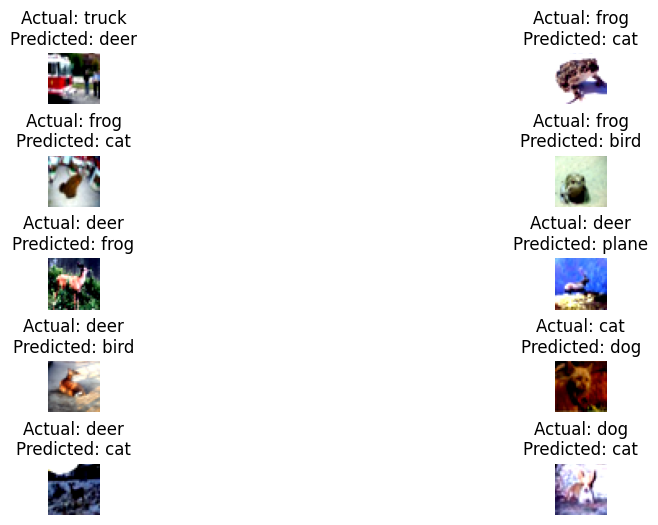

In [11]:
# To show the misclassified Images
model.plot_misclassifeid_images()

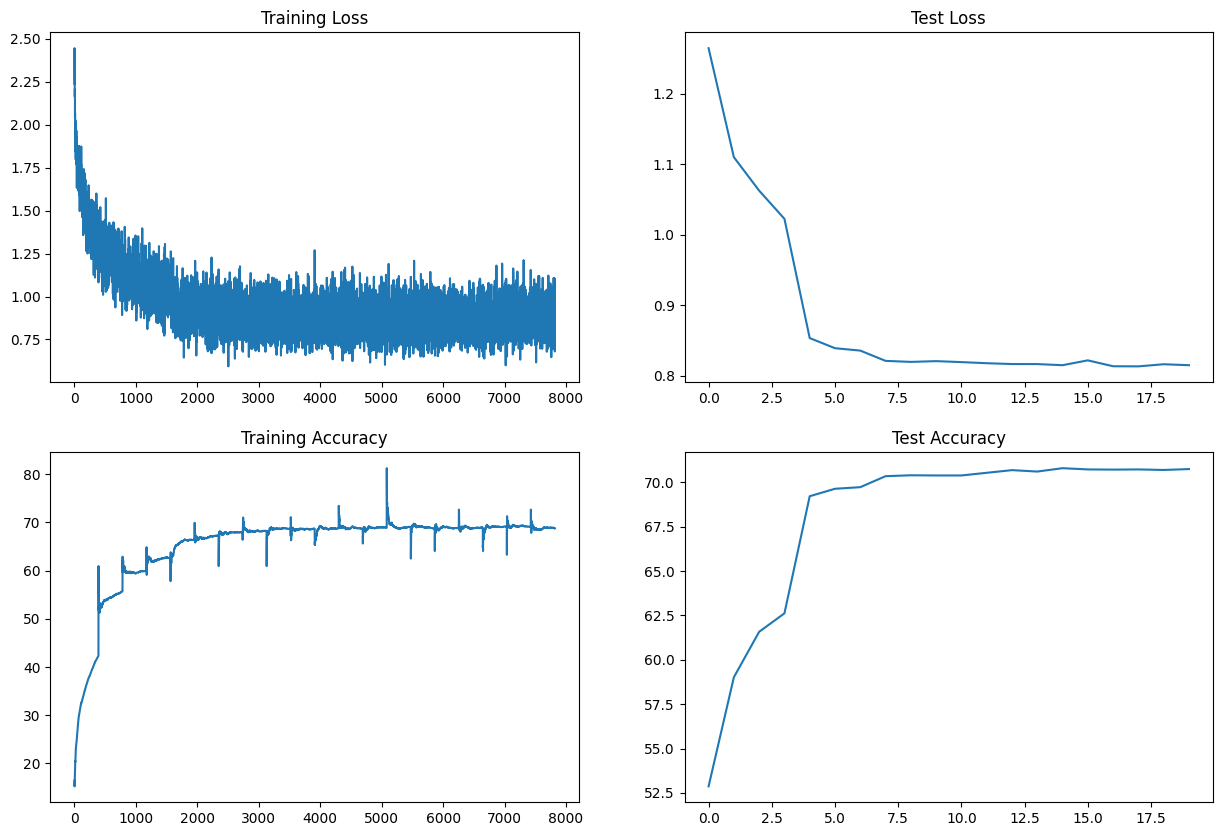

In [12]:
# Graph
model.plot_loss_accuracy_graph()